In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [2]:
# Variables
sRate = 1000 # sample rate in Hertz
freq1 = 50.0 # frequency of first sine wave
freq2 = 100.0 # frequency of second sine wave
amplitude1 = 10 # amplitude of first wave
amplitude2 = 5 # amplitude of second wave
numPeriods = 10 # number of periods of the sine waves
numSamples = sRate * numPeriods # total number of samples

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [4]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)

In [5]:
x

array([0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
       9.99799980e+00, 9.99899990e+00, 1.00000000e+01])

In [6]:
len(x)

10000

In [7]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)

In [8]:
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)

In [9]:
sampled_f1 = [f1(i) for i in x]

In [10]:
sampled_f1

[0.0,
 3.0904687553219667,
 5.878360882526012,
 8.090723937762558,
 9.51095344888693,
 9.999999876605267,
 9.509982452397487,
 8.088877011541163,
 5.875818852444947,
 3.0874805023605942,
 -0.0031419067925834284,
 -3.093456703205292,
 -5.880902332320062,
 -8.092570065301786,
 -9.511923506495133,
 -9.999998889447426,
 -9.509010517122658,
 -8.087029286819922,
 -5.873276242327813,
 -3.0844919446161576,
 0.00628381327501106,
 3.0964443457156072,
 5.883443201576229,
 8.094415393976611,
 9.512892625126334,
 9.99999691513184,
 9.508037643158389,
 8.085180763781237,
 5.8707330524255985,
 3.0815030823836853,
 -0.00942571913712713,
 -3.0994316825579786,
 -5.8859834900436745,
 -8.096259923604842,
 -9.513860804684871,
 -9.999993953658706,
 -9.507063830600714,
 -8.083331442607577,
 -5.868189282989361,
 -3.0785139159582076,
 0.01256762406877593,
 3.102418713437526,
 5.8885231974716365,
 8.098103654004442,
 9.514828045075173,
 9.999990005028314,
 9.506089079545763,
 8.081481323481505,
 5.8656449342702

In [11]:
len(sampled_f1)

10000

In [12]:
sampled_f2 = [f2(i) for i in x]

In [13]:
sampled_f2

[0.0,
 2.939180441263006,
 4.755476724443465,
 4.754991226198744,
 2.9379094262224736,
 -0.0015709533962917142,
 -2.940451166160031,
 -4.755961753247567,
 -4.754505258561329,
 -2.9366381211639063,
 0.00314190663750553,
 2.9417216007881146,
 4.756446312563167,
 4.754018821579194,
 2.9353665262127993,
 -0.004712859568563565,
 -2.9429917450218372,
 -4.7569304023424355,
 -4.753531915300357,
 -2.9340946414946805,
 0.006283812034387965,
 2.9442615987358183,
 4.757414022537587,
 4.7530445397728815,
 2.9328224671351117,
 -0.007854763879892045,
 -2.9455311618046958,
 -4.757897173100868,
 -4.752556695044886,
 -2.9315500032596624,
 0.009425714950024703,
 2.946800434103159,
 4.758379853984604,
 4.752068381164527,
 2.930277249993952,
 -0.010996665089663859,
 -2.948069415505903,
 -4.758862065141124,
 -4.751579598179995,
 -2.929004207463622,
 0.012567614143794115,
 2.9493381058876587,
 4.75934380652285,
 4.751090346139556,
 2.9277308757943263,
 -0.014138561957284706,
 -2.9506065051232016,
 -4.7598250

In [14]:
sampled_fcomb = [(f1(i)+f2(i)) for i in x]

In [15]:
len(sampled_fcomb)

10000

(-25, 25)

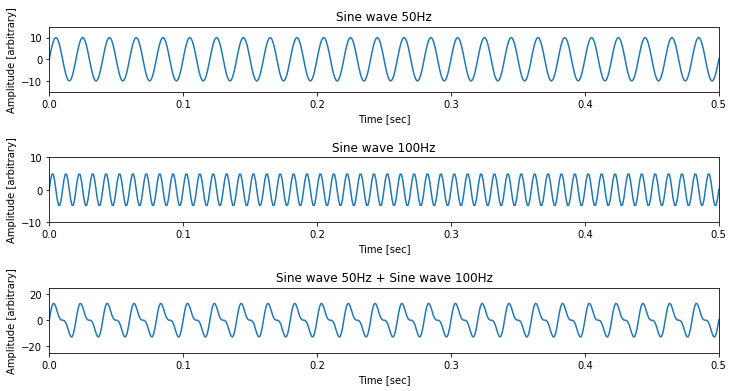

In [16]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, sampled_f1)
plt.title('Sine wave 50Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-15, 15)

plt.subplot(312)
plt.plot(x, sampled_f2)
plt.title('Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-10, 10)

plt.subplot(313)
plt.plot(x, sampled_fcomb)
plt.title('Sine wave 50Hz + Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-25, 25)

In [17]:
fft_output = np.fft.rfft(sampled_fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

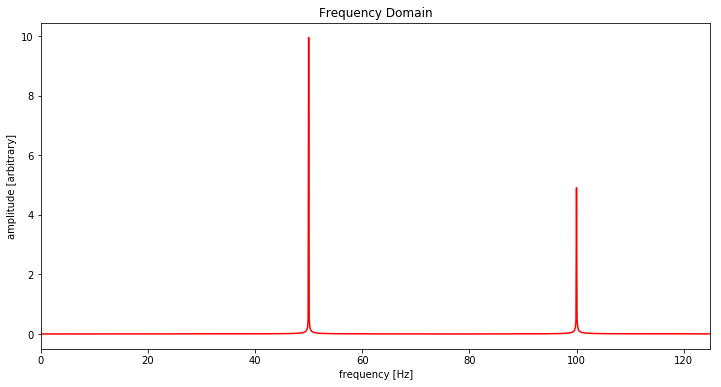

In [18]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(0, 125)
plt.plot(frequencies, magnitude, 'r')


In [19]:
sampled_fcomb

[0.0,
 6.029649196584973,
 10.633837606969477,
 12.845715163961302,
 12.448862875109404,
 9.998428923208976,
 6.569531286237456,
 3.332915258293596,
 1.1213135938836185,
 0.1508423811966879,
 -1.550778984393819e-10,
 -0.15173510241717736,
 -1.1244560197568951,
 -3.3385512437225913,
 -6.576556980282334,
 -10.00471174901599,
 -12.452002262144495,
 -12.843959689162357,
 -10.626808157628169,
 -6.018586586110838,
 0.012567625309399026,
 6.0407059444514255,
 10.640857224113816,
 12.847459933749493,
 12.445715092261445,
 9.992142151251947,
 6.562506481353693,
 3.327283590680369,
 1.1181763573807126,
 0.1499530791240229,
 -4.187102426930767e-09,
 -0.1526312484548198,
 -1.1276036360590709,
 -3.3441915424403152,
 -6.583583554690919,
 -10.01099061874837,
 -12.455133246106616,
 -12.8421935077487,
 -10.619768881169357,
 -6.007518123421829,
 0.025135238212570046,
 6.051756819325185,
 10.647867003994486,
 12.849194000143997,
 12.4425589208695,
 9.985851443071029,
 6.5554825744225615,
 3.3216562453993

In [20]:
len(sampled_fcomb)

10000

In [25]:
print ('Opening data files...')
dataFile = open('2sineXHz.dat', 'wt')  # To be run through Fortran code. Has amplitudes only.
td_dataFile = open('2sineXHz_time_domain.dat', 'wt')  # Has time domain amplitude and time data
fd_dataFile = open('2sineXHz_freq_domain.dat', 'wt')  # Has freq domain amplitude and corrected FFT frequencies (bins)

print ('Writing data files...')
np.savetxt(dataFile, sampled_fcomb, fmt='%10.10f', delimiter=' ', newline='\n')
np.savetxt(td_dataFile, np.column_stack([sampled_fcomb, x]), fmt='%10.10f', newline='\n')
np.savetxt(fd_dataFile, np.column_stack([magnitude, frequencies]), fmt='%10.10f', newline='\n')

Opening data files...
Writing data files...
